In [1]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

In [11]:
from gw_eccentricity.gw_eccentricity import measure_eccentricity
from gw_eccentricity.plot_settings import use_fancy_plotsettings, figWidthsOneColDict, figHeightsDict, lstyles, colorsDict, lwidths, colors_dj_35, labelsDict
from gw_eccentricity.utils import peak_time_via_quadratic_fit, amplitude_using_all_modes

In [3]:
import glob
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [4]:
emri_data = h5py.File("../data/OPAtestWF.h5", "r")["Dataset1"]

In [14]:
t = emri_data[:, 0]
hlm = {(2, 2): emri_data[:, 1] + 1j * emri_data[:, 2]}
shift = peak_time_via_quadratic_fit(t, amplitude_using_all_modes(hlm))[0]
t = t - shift
dataDict = {"t": t, "hlm": hlm}

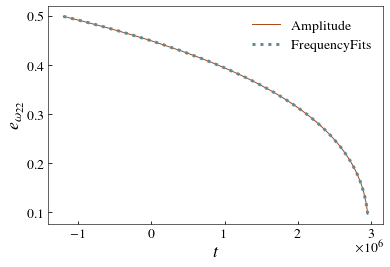

In [7]:
style = "Notebook"
methods = ["Amplitude", "FrequencyFits"]
use_fancy_plotsettings(style=style)
fig, ax = plt.subplots(figsize=(figWidthsOneColDict[style], figHeightsDict[style]))
extra_kwargs = {"debug": False}
for method in methods:
    tref_out, ecc_ref, mean_ano_ref, gwecc_obj = measure_eccentricity(
        tref_in=dataDict["t"], dataDict=dataDict, method=method, return_gwecc_object=True, extra_kwargs=extra_kwargs)
    gwecc_obj.plot_measured_ecc(fig, ax, **{"label": method, "ls": lstyles[method], "c": colorsDict[method], "lw": lwidths[method]})
ax.set_ylabel(r"$e_{\omega_{22}}$")
ax.legend()

In [8]:
ax.text(0.97, 0.97, f"EMRI", va="top", ha="right", transform=ax.transAxes)

Text(0.97, 0.97, 'EMRI')

In [9]:
fig.tight_layout()
fig.savefig("EMRI.pdf")

### make plot for paper

-51287.710096747614


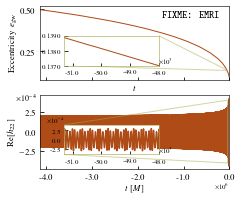

In [60]:
style = "APS"
method = "FrequencyFits"
# method = "Amplitude"
use_fancy_plotsettings(style=style)
fig, axes = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[style], 3), sharex=True)
extra_kwargs = {"debug": False}
tref_out, ecc_ref, mean_ano_ref, gwecc_obj = measure_eccentricity(
    tref_in=dataDict["t"], dataDict=dataDict, method=method, return_gwecc_object=True, extra_kwargs=extra_kwargs)
gwecc_obj.plot_measured_ecc(fig, axes[0], **{"ls": "-", "c": colorsDict["default"], "lw": 1})
axes[0].set_ylabel(labelsDict["eccentricity"])

axes[1].plot(dataDict["t"], np.real(dataDict["hlm"][(2, 2)]), c=colorsDict["default"])
axes[1].set_xlabel(labelsDict["t_dimless"])
axes[1].set_ylabel(labelsDict["h22_real"])
axes[0].text(0.95, 0.95, r"\texttt{FIXME: EMRI}", ha="right", va="top", transform=axes[0].transAxes, fontsize=10)
axes[0].set_xlim(tref_out[0], tref_out[-1])

tx = axes[1].yaxis.get_offset_text()
tx.set_visible(False)
axes[1].text(-0.02, 1.0, r"$\times 10^{-4}$", fontsize=8, ha="right", va="top", transform=axes[1].transAxes)

xfactor = 1e6
xticks = np.array([-4, -3, -2, -1, 0]) * xfactor
xticklabels = [f"{x}" for x in xticks / xfactor]
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticklabels)
axes[1].text(1.0, -0.2, r"$\times 10^{6}$", fontsize=7, va="top", ha="right", transform=axes[1].transAxes)


# insets
axins_egw = axes[0].inset_axes([0.13, 0.2, 0.5, 0.4])
axins_hreal = axes[1].inset_axes([0.13, 0.2, 0.5, 0.4])

gwecc_obj.plot_measured_ecc(fig, axins_egw, **{"ls": "-", "c": colorsDict["default"], "lw": 1})
axins_hreal.plot(dataDict["t"], np.real(dataDict["hlm"][(2, 2)]), c=colorsDict["default"])
tstart = 2.9e6 - shift
print(tstart)
axins_hreal.set_ylim(-4e-4, 4e-4)
axins_egw.set_ylim(0.1370, 0.1390)
# xticks = (np.array([2.9, 2.901, 2.902, 2.903]) * 1e6) - shift
xfactor = 1e3
xticks = np.array([-51, -50, -49, -48]) * xfactor
xticklabels = [f"{x:.1f}" for x in xticks / xfactor]
yticks = np.array([0.1370, 0.1380, 0.1390])
yticklabels = [f"{y:.4f}" for y in yticks]
axins_egw.set_yticks(yticks)
axins_egw.set_yticklabels(yticklabels, fontsize=7)
yfactor = 1e-4
yticks = np.array([-2.5, 0.0, 2.5]) * yfactor
yticklabels = [f"{y:.1f}" for y in yticks / yfactor]
axins_hreal.set_yticks(yticks)
axins_hreal.set_yticklabels(yticklabels, fontsize=7)

for ax in [axins_egw, axins_hreal]:
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xlim(tstart, tstart + 3e3)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, fontsize=7)
    ax.text(1.0, 0.0, r"$\times 10^{3}$", fontsize=7, va="bottom", ha="left", transform=ax.transAxes)
    
    for pos in ['top', 'bottom', 'right', 'left']:
        ax.spines[pos].set_edgecolor(colors_dj_35[0])
        
axins_hreal.text(0.0, 1.0, r"$\times 10^{-4}$", fontsize=7, va="bottom", ha="right", transform=ax.transAxes)

axes[1].ticklabel_format(style='sci', scilimits=(-3,6), axis='y')

_, connectLinesAmp = axes[0].indicate_inset_zoom(axins_egw, edgecolor=colors_dj_35[0])
# connectLinesAmp[0].set_linestyle(":")
# connectLinesAmp[2].set_linestyle(":")
# connectLinesAmp[0].set(visible=False)
# connectLinesAmp[2].set(visible=False)

_, connectLinesFreq = axes[1].indicate_inset_zoom(axins_hreal, edgecolor=colors_dj_35[0])
# connectLinesFreq[0].set_linestyle(":")
# connectLinesFreq[2].set_linestyle(":")
# connectLinesFreq[0].set(visible=False)
# connectLinesFreq[2].set(visible=False)

In [61]:
tref_out[-1]

-377.0970006384887

In [62]:
q = 1
chi1 = 0
chi2 = 0
axes[0].set_title(fr"FIXME: $q={q:.1f}$, $\chi_{{1z}}={chi1:.1f}$, $\chi_{{2z}}={chi2:.1f}$", fontsize=10, ha="center")
fig.subplots_adjust(left=0.16, right=0.97, top=0.92, hspace=0.05)
fig.savefig("../paper/figs/demo_EMRI.pdf")

(0.1371, 0.13875)

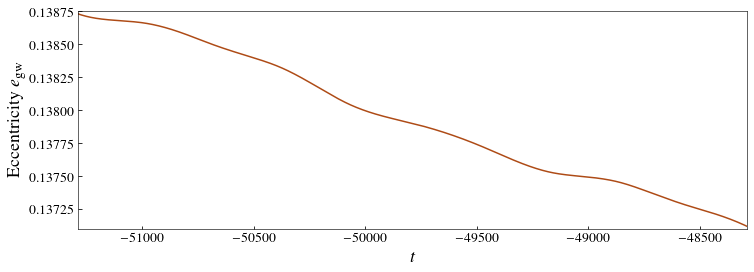

In [35]:
fig1, ax1 = gwecc_obj.plot_measured_ecc()
ax1.set_xlim(tstart, tstart + 3e3)
ax1.set_ylim(0.1371, 0.13875)

In [73]:
?axins_egw.set_xticklabels

Signature: axins_egw.set_xticklabels(labels, *, fontdict=None, minor=False, **kwargs)
Docstring:
Set the xaxis' labels with list of string labels.

.. warning::
    This method should only be used after fixing the tick positions
    using `.Axes.set_xticks`. Otherwise, the labels may end up in
    unexpected positions.

Parameters
----------
labels : list of str
    The label texts.

fontdict : dict, optional
    A dictionary controlling the appearance of the ticklabels.
    The default *fontdict* is::

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight': rcParams['axes.titleweight'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

minor : bool, default: False
    Whether to set the minor ticklabels rather than the major ones.

Returns
-------
list of `.Text`
    The labels.

Other Parameters
----------------
**kwargs : `~.text.Text` properties.
File:      ~/miniconda3/envs/eccimrct/lib/python3.8/site-packages/matplotlib/axes/_base.py
Type